# Education Project

**Abstract:** Predicting Average ACT Scores from Socioeconomic Factors Using Multiple Linear Regression

**Author:** Badamgarav Battushig  
**Course:** DATA 5100 – Foundations of Data Science  
**Instructor:** Professor Brian Fischer  
**Institution:** Seattle University  
**Date:** October 22, 2025

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

## Reading Files

In [2]:
edgap = pd.read_excel(
    "C:/Users/badam/education/data/EdGap_data.xlsx",
    dtype={'NCESSCH School ID': object}
)

C:\Users\badam\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [3]:
School_information = pd.read_csv("https://www.dropbox.com/s/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv?dl=1", encoding='unicode_escape',low_memory= False)

In [191]:
school = pd.read_csv(
    "C:/Users/badam/education/data/school.csv",
     encoding='unicode_escape',low_memory= False)

## Checking Dataset Structure

In [6]:
school["TITLEI"].head(10)

0    1-Yes
1    1-Yes
2    1-Yes
3    1-Yes
4    1-Yes
5    1-Yes
6    1-Yes
7    1-Yes
8     2-No
9    1-Yes
Name: TITLEI, dtype: object

In [5]:
school.head()

,ï»¿X,Y,OBJECTID,NCESSCH,SURVYEAR,STABR,LEAID,ST_LEAID,LEA_NAME,SCH_NAME,...,HIALF,HI,TRALM,TRALF,TR,WHALM,WHALF,WH,LATCOD,LONCOD
0,-86.206200,34.2602,1,10000500870,2020-2021,AL,100005,AL-101,Albertville City,Albertville Middle School,...,230.0,469.0,19.0,10.0,29.0,187.0,184.0,371.0,34.2602,-86.206200
1,-86.204900,34.2622,2,10000500871,2020-2021,AL,100005,AL-101,Albertville City,Albertville High School,...,371.0,785.0,17.0,21.0,38.0,368.0,338.0,706.0,34.2622,-86.204900
2,-86.220100,34.2733,3,10000500879,2020-2021,AL,100005,AL-101,Albertville City,Albertville Intermediate School,...,253.0,481.0,17.0,12.0,29.0,177.0,168.0,345.0,34.2733,-86.220100
3,-86.221806,34.2527,4,10000500889,2020-2021,AL,100005,AL-101,Albertville City,Albertville Elementary School,...,237.0,497.0,7.0,8.0,15.0,180.0,160.0,340.0,34.2527,-86.221806
4,-86.193300,34.2898,5,10000501616,2020-2021,AL,100005,AL-101,Albertville City,Albertville Kindergarten and PreK,...,137.0,288.0,6.0,7.0,13.0,108.0,108.0,216.0,34.2898,-86.193300


Converts string-coded values in the TITLEI column into numeric binary form:

1 → means the school participates in the Title I program (a U.S. federal program providing funding to low-income schools).

0 → means not a Title I school.
This makes the column easier to use in analysis or regression models.

In [7]:
# Convert "1-Yes" → 1 and "2-No" → 0
school["TITLEI"] = school["TITLEI"].replace({
    "1-Yes": 1,
    "2-No": 0
})

# Replace any unknown code like 'M' with NaN
school["TITLEI"] = school["TITLEI"].replace("M", np.nan)

# Ensure it's numeric type (not string)
school["TITLEI"] = pd.to_numeric(school["TITLEI"], errors="coerce")

# Check the cleaned result
school["TITLEI"].value_counts(dropna=False)

TITLEI
1.0    60044
0.0    23643
NaN    17035
Name: count, dtype: int64

In [8]:
edgap.head()

,NCESSCH School ID,CT Unemployment Rate,CT Pct Adults with College Degree,CT Pct Childre In Married Couple Family,CT Median Household Income,School ACT average (or equivalent if SAT score),School Pct Free and Reduced Lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [9]:
School_information.head()

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,...,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,01,NaN,AL-210,0100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
1,2016-2017,1,ALABAMA,AL,Camps,Alabama Youth Services,01,NaN,AL-210,0100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
2,2016-2017,1,ALABAMA,AL,Det Ctr,Alabama Youth Services,01,NaN,AL-210,0100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
3,2016-2017,1,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,Alabama Youth Services,01,NaN,AL-210,0100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
4,2016-2017,1,ALABAMA,AL,McNeel Sch - Vacca Campus,Alabama Youth Services,01,NaN,AL-210,0100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported


The dataset is filtered to include only rows where the school level is **High**.  
This ensures the analysis focuses exclusively on high schools, since ACT scores apply only to that level.

In [192]:
school=school.loc[school['SCHOOL_LEVEL']=='High']
school

,ï»¿X,Y,OBJECTID,NCESSCH,SURVYEAR,STABR,LEAID,ST_LEAID,LEA_NAME,SCH_NAME,...,HIALF,HI,TRALM,TRALF,TR,WHALM,WHALF,WH,LATCOD,LONCOD
1,-86.204900,34.262200,2,10000500871,2020-2021,AL,100005,AL-101,Albertville City,Albertville High School,...,371.0,785.0,17.0,21.0,38.0,368.0,338.0,706.0,34.262200,-86.204900
7,-86.142000,34.362500,8,10000600872,2020-2021,AL,100006,AL-048,Marshall County,Asbury High School,...,160.0,285.0,1.0,2.0,3.0,182.0,146.0,328.0,34.362500,-86.142000
10,-86.319462,34.178658,11,10000600878,2020-2021,AL,100006,AL-048,Marshall County,Douglas High School,...,119.0,255.0,2.0,3.0,5.0,203.0,177.0,380.0,34.178658,-86.319462
12,-86.253261,34.534948,13,10000600883,2020-2021,AL,100006,AL-048,Marshall County,Kate D Smith DAR High School,...,5.0,14.0,6.0,1.0,7.0,225.0,180.0,405.0,34.534948,-86.253261
15,-86.285900,34.305400,16,10000600987,2020-2021,AL,100006,AL-048,Marshall County,Marshall Technical School,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.305400,-86.285900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100698,-66.399500,18.431900,100699,720003002085,2020-2021,PR,7200030,PR-01,PUERTO RICO DEPARTMENT OF EDUCATION,JUAN QUIRINDONGO MORELL (SUPERIOR),...,256.0,499.0,NaN,NaN,NaN,NaN,NaN,NaN,18.431900,-66.399500
100704,-64.798638,17.722947,100705,780000200013,2020-2021,VI,7800002,VI-002,Saint Croix School District,ST. CROIX EDUCATIONAL COMPEX HIGH SCHOOL,...,97.0,183.0,NaN,1.0,1.0,4.0,2.0,6.0,17.722947,-64.798638
100709,-64.780456,17.725655,100710,780000200030,2020-2021,VI,7800002,VI-002,Saint Croix School District,SAINT CROIX CENTRAL HIGH,...,142.0,277.0,1.0,4.0,5.0,4.0,NaN,4.0,17.725655,-64.780456
100711,-64.918749,18.342037,100712,780003000005,2020-2021,VI,7800030,VI-001,Saint Thomas - Saint John School District,CHARLOTTE AMALIE HIGH SCHOOL,...,88.0,170.0,1.0,6.0,7.0,11.0,10.0,21.0,18.342037,-64.918749


Selected relevant columns from the school dataset to keep only key variables needed for the analysis,  
including school ID, Title I status, lunch program counts, teacher and student information, and enrollment totals.


In [193]:
school = school[['NCESSCH', 'TITLEI', 'TOTFRL', 'FRELCH', 'REDLCH', 'FTE', 'STUTERATIO', 'TOTAL', 'MEMBER']]

Selected specific columns from the School Information dataset to retain only essential details,  
such as school year, ID, state, ZIP code, school type, level, and charter status for merging and analysis.


In [13]:
School_information=School_information[['SCHOOL_YEAR','NCESSCH', 'LSTATE', 'LZIP','SCH_TYPE_TEXT', 'LEVEL','CHARTER_TEXT']]

In [14]:
School_information.head()

,SCHOOL_YEAR,NCESSCH,LSTATE,LZIP,SCH_TYPE_TEXT,LEVEL,CHARTER_TEXT
0,2016-2017,1.000020e+10,AL,35220,Alternative School,High,No
1,2016-2017,1.000020e+10,AL,36067,Alternative School,High,No
2,2016-2017,1.000020e+10,AL,36784,Alternative School,High,No
3,2016-2017,1.000020e+10,AL,36057,Alternative School,High,No
4,2016-2017,1.000020e+10,AL,35206,Alternative School,High,No


## Renaming DataFrame Columns for Clarity

The following code renames several columns to make them more concise and easier to work with in subsequent analysis.

In [15]:
edgap = edgap.rename(
    columns={
        "NCESSCH School ID": "id",
        "CT Pct Adults with College Degree": "percent_college",
        "CT Unemployment Rate": "rate_unemployment",
        "CT Pct Childre In Married Couple Family": "percent_married",
        "CT Median Household Income": "median_income",
        "School ACT average (or equivalent if SAT score)": "average_act",
        "School Pct Free and Reduced Lunch": "percent_lunch"
    }
)

In [16]:
edgap.head(3)

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816


In [17]:
School_information = School_information.rename(
    columns={
        "SCHOOL_YEAR": "year",
        "NCESSCH": "id",
        "LSTATE": "state",
        "LZIP": "zip_code",
        "SCH_TYPE_TEXT": "school_type",
        "LEVEL": "school_level",
        "CHARTER_TEXT": "charter"
    }
)

In [18]:
School_information.head(3)

,year,id,state,zip_code,school_type,school_level,charter
0,2016-2017,1.000020e+10,AL,35220,Alternative School,High,No
1,2016-2017,1.000020e+10,AL,36067,Alternative School,High,No
2,2016-2017,1.000020e+10,AL,36784,Alternative School,High,No


In [19]:
school = school.rename(
    columns={
        "NCESSCH": "id",
        "TOTFRL": "total_free_reduced_lunch",
        "FRELCH": "free_lunch",
        "REDLCH": "reduced_lunch",
        "FTE": "teachers_fte",
        "STUTERATIO": "student_teacher_ratio",
        "TOTAL": "total_students",
        "MEMBER": "student_membership",
        "TITLEI" : "funding_status"
    }
)


In [20]:
school.head()

,id,funding_status,total_free_reduced_lunch,free_lunch,reduced_lunch,teachers_fte,student_teacher_ratio,total_students,student_membership
1,10000500871,1.0,456.0,456.0,0.0,82.000000,19.59,1606.0,1606.0
7,10000600872,1.0,524.0,473.0,51.0,33.080002,18.98,628.0,628.0
10,10000600878,1.0,NaN,NaN,NaN,30.180000,21.40,646.0,646.0
12,10000600883,1.0,146.0,127.0,19.0,24.270000,17.88,434.0,434.0
15,10000600987,0.0,NaN,NaN,NaN,NaN,-1.00,NaN,NaN


## Merge Datasets

In this step, we convert the `id` columns in all datasets (`edgap`, `School_information`, and `school`) to **string (text)** format to ensure consistency before merging.  
IDs are identifiers, not numeric values, so treating them as strings prevents issues like losing leading zeros or creating decimal points (e.g., `12345.0`).  
We also remove any extra `.0` that appears when numeric IDs are read as floats from Excel or CSV files.


In [21]:
edgap["id"] = edgap["id"].astype(str)
School_information["id"] = (
    School_information["id"].astype(str).str.replace(".0", "", regex=False)
)
school["id"] = school["id"].astype(str)

In [22]:
school.head(1)

,id,funding_status,total_free_reduced_lunch,free_lunch,reduced_lunch,teachers_fte,student_teacher_ratio,total_students,student_membership
1,10000500871,1.0,456.0,456.0,0.0,82.0,19.59,1606.0,1606.0


In [23]:
School_information.head(1)

,year,id,state,zip_code,school_type,school_level,charter
0,2016-2017,10000200277,AL,35220,Alternative School,High,No


In [24]:
edgap.head(1)

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901


Checked the character length of the **school ID** column in each dataset to ensure consistency before merging.  
This helps confirm that all ID fields (from EdGap, School Information, and School datasets) use the same format and length for accurate merging.


In [26]:
school.head(1)

,id,funding_status,total_free_reduced_lunch,free_lunch,reduced_lunch,teachers_fte,student_teacher_ratio,total_students,student_membership
1,10000500871,1.0,456.0,456.0,0.0,82.0,19.59,1606.0,1606.0


In [25]:
print(edgap["id"].str.len().value_counts())
print(School_information["id"].str.len().value_counts())
print(school["id"].str.len().value_counts())

id
12    7986
Name: count, dtype: int64
id
12    82920
11    19261
3         2
Name: count, dtype: int64
id
12    18891
11     4404
Name: count, dtype: int64


Merged the **EdGap** dataset with the **School Information** dataset using the shared **school ID (id)** field.  
A left join was applied to retain all records from the EdGap dataset while adding corresponding school details.


In [27]:
df=edgap.merge(
    School_information,
    how='left',
    on='id'
    )

In [28]:
df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,school_type,school_level,charter
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High,Yes
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High,No
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High,No
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High,No
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High,No


Merged the main dataset with the school dataset using the common **school ID (id)** field.  
A left join was used to keep all records from the main dataset while adding matching school information.


In [29]:
df = df.merge(
    school,
    how='left',
    left_on='id',
    right_on='id'
)


Filtered the main dataset to include only rows where the school level is **High**,  
ensuring that the analysis focuses solely on high schools relevant to ACT performance.


In [194]:
df=df.loc[df['school_level']=='High']
df

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,...,student_teacher_ratio,total_students,student_membership,rate_unemployment_normalized,percent_college_normalized,percent_lunch_normalized,funding_status_normalized,student_teacher_ratio_normalized,free_lunch_normalized,teachers_fte_normalized
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,6.690141,2016-2017,DE,19804,...,19.97,579.0,579.0,0.354128,-0.760265,-0.450567,0.648145,-0.076776,-0.076776,-0.076776
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,11.241218,2016-2017,DE,19709,...,16.36,1701.0,1701.0,-0.484933,0.543605,-0.392370,-1.542866,-0.076776,-0.076776,-0.076776
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,9.681611,2016-2017,DE,19709,...,15.57,1613.0,1613.0,-0.601897,0.778021,-0.412313,-1.542866,-0.076776,-0.076776,-0.076776
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,29.696025,2016-2017,DE,19958,...,15.74,1637.0,1637.0,-0.784102,0.719252,-0.156377,-1.542866,-0.076776,-0.076776,-0.076776
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,26.264114,2016-2017,DE,19934,...,15.95,2116.0,2116.0,-0.282403,0.407485,-0.200263,-1.542866,-0.076776,-0.076776,-0.076776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7222,560530200294,0.034549,0.590780,0.720077,64891.0,18.500000,23.215573,2016-2017,WY,82901,...,15.81,1437.0,1437.0,-0.942493,0.112033,-0.239246,-1.542866,-0.076776,-0.076776,-0.076776
7223,560569000311,0.069538,0.633860,0.808841,44603.0,22.300000,8.387097,2016-2017,WY,82833,...,11.80,148.0,148.0,-0.398607,0.370312,-0.428867,-1.542866,-0.076776,-0.076776,-0.076776
7224,560569500360,0.035159,0.764566,0.776570,44896.0,21.500000,18.482906,2016-2017,WY,82801,...,14.90,1004.0,1004.0,-0.933018,1.153936,-0.299766,-1.542866,-0.076776,-0.076776,-0.076776
7225,560576200324,0.063877,0.670532,0.879324,92134.0,19.700000,11.258278,2016-2017,WY,82935,...,15.44,696.0,696.0,-0.486609,0.590176,-0.392152,-1.542866,-0.076776,-0.076776,-0.076776


## Data Overview

In [31]:
df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,...,school_level,charter,funding_status,total_free_reduced_lunch,free_lunch,reduced_lunch,teachers_fte,student_teacher_ratio,total_students,student_membership
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,...,High,Yes,1.0,NaN,NaN,NaN,29.000000,19.97,579.0,579.0
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,...,High,No,0.0,NaN,NaN,NaN,104.000000,16.36,1701.0,1701.0
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,...,High,No,0.0,NaN,NaN,NaN,103.599998,15.57,1613.0,1613.0
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,...,High,No,0.0,NaN,NaN,NaN,104.000000,15.74,1637.0,1637.0
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,...,High,No,0.0,NaN,NaN,NaN,132.699997,15.95,2116.0,2116.0


In [32]:
df.columns

Index(['id', 'rate_unemployment', 'percent_college', 'percent_married',
       'median_income', 'average_act', 'percent_lunch', 'year', 'state',
       'zip_code', 'school_type', 'school_level', 'charter', 'funding_status',
       'total_free_reduced_lunch', 'free_lunch', 'reduced_lunch',
       'teachers_fte', 'student_teacher_ratio', 'total_students',
       'student_membership'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7230 entries, 0 to 7985
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        7230 non-null   object 
 1   rate_unemployment         7218 non-null   float64
 2   percent_college           7219 non-null   float64
 3   percent_married           7210 non-null   float64
 4   median_income             7214 non-null   float64
 5   average_act               7230 non-null   float64
 6   percent_lunch             7230 non-null   float64
 7   year                      7230 non-null   object 
 8   state                     7230 non-null   object 
 9   zip_code                  7230 non-null   object 
 10  school_type               7230 non-null   object 
 11  school_level              7230 non-null   object 
 12  charter                   7230 non-null   object 
 13  funding_status            6534 non-null   float64
 14  total_free_re

In [34]:
df.describe()

,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,funding_status,total_free_reduced_lunch,free_lunch,reduced_lunch,teachers_fte,student_teacher_ratio,total_students,student_membership
count,7218.000000,7219.000000,7210.000000,7214.000000,7230.000000,7230.000000,6534.000000,5356.000000,5348.000000,5348.000000,6540.000000,7094.000000,7099.00000,7099.00000
mean,0.096437,0.572968,0.640475,52760.472692,20.288880,0.409447,0.704163,500.689881,457.816754,43.617614,62.579986,14.922537,1020.02282,1020.02282
std,0.056610,0.165067,0.191362,24365.505210,2.552661,0.235304,0.456453,485.463886,458.285602,53.460705,43.031122,10.162439,768.38274,768.38274
min,0.000000,0.091493,0.000000,4833.000000,-3.070818,-0.054545,0.000000,3.000000,0.000000,0.000000,0.000000,-1.000000,21.00000,21.00000
25%,0.057915,0.454489,0.534494,37106.000000,18.800000,0.231863,0.000000,175.000000,153.000000,9.000000,29.340000,12.540000,412.00000,412.00000
50%,0.084249,0.559406,0.671713,47404.000000,20.500000,0.371203,1.000000,337.500000,305.000000,25.000000,51.035000,15.305000,793.00000,793.00000
75%,0.121022,0.680251,0.779260,62106.000000,22.000000,0.556800,1.000000,653.000000,591.250000,58.000000,85.302502,18.170000,1444.00000,1444.00000
max,0.590278,1.000000,1.000000,226181.000000,32.362637,0.998729,1.000000,4364.000000,4364.000000,512.000000,291.769989,518.750000,5414.00000,5414.00000


Mention that this shows the range of numerical values to detect outliers or unrealistic data.

In [35]:
df.select_dtypes(include=['number']).agg(['min', 'max']).round(2)

,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,funding_status,total_free_reduced_lunch,free_lunch,reduced_lunch,teachers_fte,student_teacher_ratio,total_students,student_membership
min,0.00,0.09,0.0,4833.0,-3.07,-0.05,0.0,3.0,0.0,0.0,0.00,-1.00,21.0,21.0
max,0.59,1.00,1.0,226181.0,32.36,1.00,1.0,4364.0,4364.0,512.0,291.77,518.75,5414.0,5414.0


## Data Cleaning

If any school has a negative percent_lunch (which is impossible), it changes that value to NaN (missing). If any school has an ACT score below 1 (also impossible), it changes that to NaN.

In [36]:
df.loc[df['percent_lunch'] < 0, 'percent_lunch'] = np.nan
df.loc[df['average_act'] < 1, 'average_act'] = np.nan
df.loc[df['funding_status'] < 0, 'funding_status'] = np.nan

Checked for duplicate rows in the dataset to ensure data integrity.  
This command returns the total number of duplicate records present after merging.

In [195]:
df.duplicated().sum()

np.int64(0)

Calculated the total number of missing values in each column of the dataset.  
This helps identify which variables require cleaning, imputation, or removal before analysis.


In [38]:
df.isna().sum().to_frame(name="Number of Missing Values")

,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,3
percent_lunch,20
year,0
state,0
zip_code,0


Counted the number of unique states represented in the dataset to understand the geographic coverage of the schools included in the analysis.


In [40]:
df['state'].nunique()

20

Removed rows with missing values in the **average_act** column to ensure that the analysis only includes schools with valid ACT score data.

In [41]:
df=df.dropna(subset=['average_act'])

Rechecked the dataset for missing values after removing rows without ACT scores.  
This confirms how many missing entries remain in each column before further cleaning or imputation.

In [42]:
df.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,0
percent_lunch,20
year,0
state,0
zip_code,0


Defined a list of **predictor variables** to be used in the analysis.  
These variables represent socioeconomic, educational, and school-related factors that may influence average ACT scores.


In [43]:
df.columns

Index(['id', 'rate_unemployment', 'percent_college', 'percent_married',
       'median_income', 'average_act', 'percent_lunch', 'year', 'state',
       'zip_code', 'school_type', 'school_level', 'charter', 'funding_status',
       'total_free_reduced_lunch', 'free_lunch', 'reduced_lunch',
       'teachers_fte', 'student_teacher_ratio', 'total_students',
       'student_membership'],
      dtype='object')

In [44]:
predictor_variables = [
    'median_income',
    'percent_college',
     'percent_lunch',
     'rate_unemployment',
     'student_teacher_ratio',
     'teachers_fte',
     'school_type',
     'charter',
    'total_free_reduced_lunch',
    'free_lunch',
    'reduced_lunch',
    'total_students',
    'student_membership',
    'percent_married',
    'funding_status'
]

To handle missing values in our dataset, we'll use scikit-learn's IterativeImputer, which is an advanced imputation technique that estimates missing values by modeling each feature as a function of other features.

In [45]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()

Selected only the **numerical predictor variables** from the dataset to prepare for statistical analysis and modeling.  
This step filters out non-numeric data types, keeping only variables suitable for correlation and regression analysis.


In [46]:
numerical_predictors = df[predictor_variables].select_dtypes(include="number").columns.to_list()
print(numerical_predictors)

['median_income', 'percent_college', 'percent_lunch', 'rate_unemployment', 'student_teacher_ratio', 'teachers_fte', 'total_free_reduced_lunch', 'free_lunch', 'reduced_lunch', 'total_students', 'student_membership', 'percent_married', 'funding_status']


Fitted the **imputer** on all numerical predictor variables to learn how to replace missing values.  
This step calculates the necessary statistics (such as mean or median) for each numeric column before imputation.


In [47]:
imputer.fit(df.loc[:,numerical_predictors])

C:\Users\badam\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


IterativeImputer()

Applied the trained **imputer** to replace missing values in all numerical predictor columns.  
This ensures that the dataset has no gaps in numeric data, allowing accurate and consistent analysis.


In [48]:
df.loc[:, numerical_predictors] = imputer.transform(df.loc[:, numerical_predictors])

Checked the dataset again for any remaining missing values after imputation.  
This confirms that all numerical predictor columns have been successfully cleaned and are ready for analysis.


In [49]:
df.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
id,0
rate_unemployment,0
percent_college,0
percent_married,0
median_income,0
average_act,0
percent_lunch,0
year,0
state,0
zip_code,0


## Exploratory Data Analysis (EDA) – Setup

Verified the current working directory and exported the cleaned dataset to a CSV file named **education2_clean.csv**.  
This step saves the processed data locally for future analysis or model development.


In [50]:
import os
os.getcwd()

df.to_csv(r"C:\Users\badam\education\data\education2_clean.csv", encoding="utf-8-sig", index=False)

Imported all necessary Python libraries for data analysis and visualization.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

In [52]:
df=pd.read_csv('C:/Users/badam/education/data/education2_clean.csv')

In [53]:
df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,...,school_level,charter,funding_status,total_free_reduced_lunch,free_lunch,reduced_lunch,teachers_fte,student_teacher_ratio,total_students,student_membership
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,...,High,Yes,1.0,493.591687,446.860391,46.731296,29.000000,19.97,579.0,579.0
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,...,High,No,0.0,498.986759,453.250034,45.736725,104.000000,16.36,1701.0,1701.0
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,...,High,No,0.0,498.534479,454.549069,43.985410,103.599998,15.57,1613.0,1613.0
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,...,High,No,0.0,502.708940,459.020643,43.688297,104.000000,15.74,1637.0,1637.0
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,...,High,No,0.0,505.731199,462.069453,43.661745,132.699997,15.95,2116.0,2116.0


In [54]:
df.columns

Index(['id', 'rate_unemployment', 'percent_college', 'percent_married',
       'median_income', 'average_act', 'percent_lunch', 'year', 'state',
       'zip_code', 'school_type', 'school_level', 'charter', 'funding_status',
       'total_free_reduced_lunch', 'free_lunch', 'reduced_lunch',
       'teachers_fte', 'student_teacher_ratio', 'total_students',
       'student_membership'],
      dtype='object')

### Economic Factors Section

Created a correlation heatmap to visualize the relationships between key **economic factors**  
(`median_income`, `percent_college`, `percent_married`) and **average ACT scores**.  
The heatmap helps identify whether higher income, education level, or family stability are positively or negatively correlated with ACT performance.


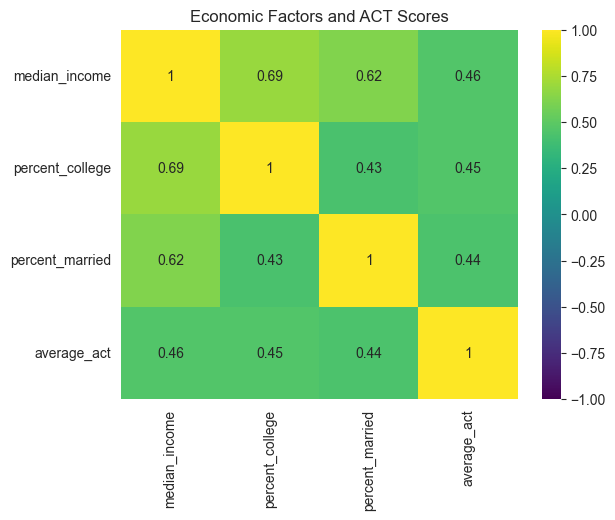

In [183]:
# Correlation heatmap
sns.heatmap(df[['median_income', 'percent_college', 'percent_married', 'average_act']].corr(),
            annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title("Economic Factors and ACT Scores")
plt.show()



In the heatmap we can see consistent positive trends between test results and economic well-being.

Generated a pairplot to explore the relationships between **economic variables** and **average ACT scores**.  
Regression trend lines indicate the direction of each relationship, while color-coding by **charter status**  
shows potential differences between school types. This visualization helps confirm the positive associations  
between income, education level, and ACT performance observed in the heatmap.

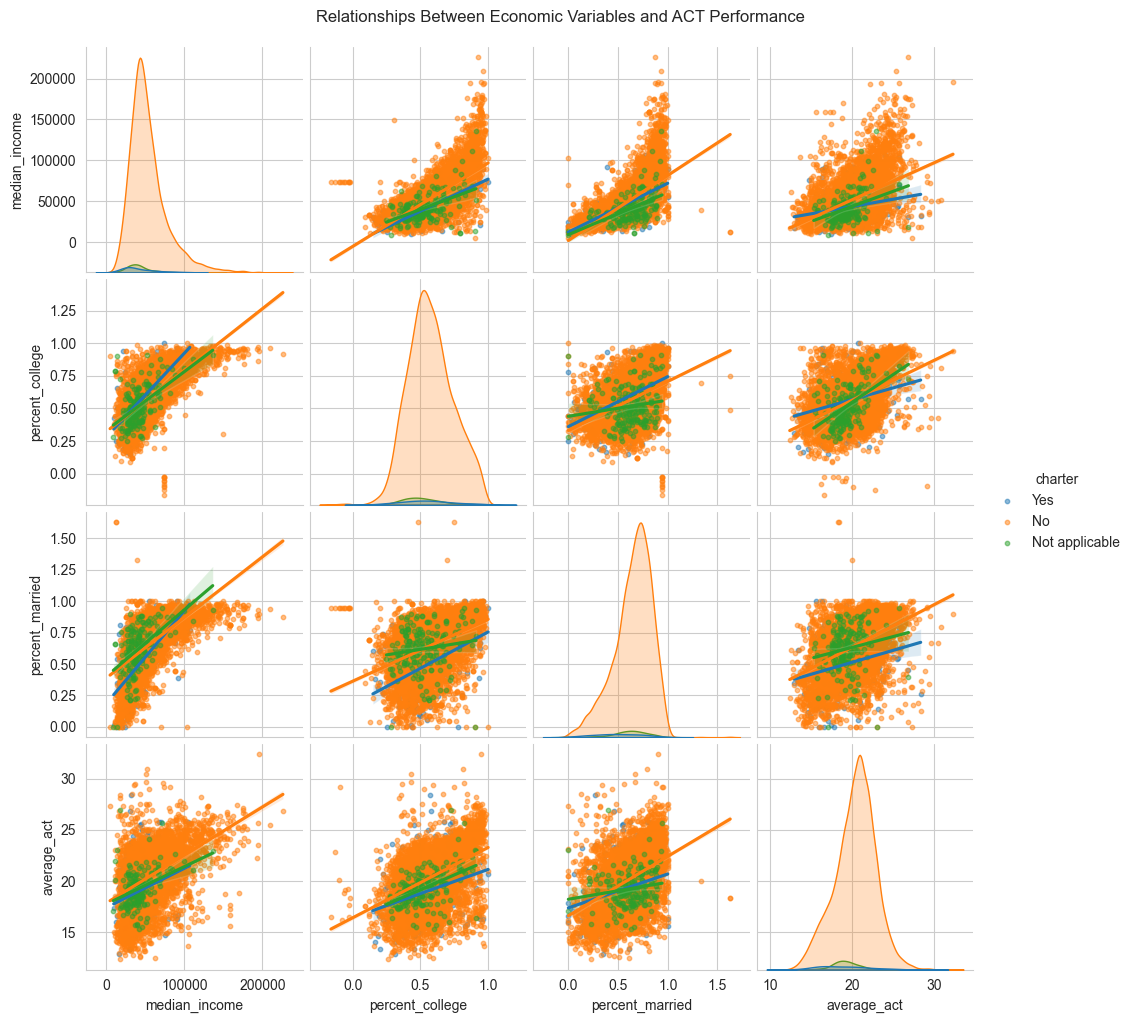

In [184]:
# Pairplot to visualize trends
sns.pairplot(df, vars=['median_income', 'percent_college', 'percent_married', 'average_act'],
             kind='reg', hue='charter',
             plot_kws={'scatter_kws': {'alpha': 0.5, 's': 10}})
plt.suptitle("Relationships Between Economic Variables and ACT Performance", y=1.02)
plt.show()


 Moreover, pairplot trend lines with upward slopes confirm they have a positive relationship as well. We can say that community wealth improves students' ACT test results.

### Employment & Staffing Factors

Cleaned the employment and staffing dataset by removing invalid or extreme values before visualization.  
Created a correlation heatmap to examine relationships between **employment stability factors**  
(`rate_unemployment`, `student_teacher_ratio`, `teachers_fte`) and **average ACT scores**.  
The heatmap highlights how community employment and teacher availability relate to academic performance.


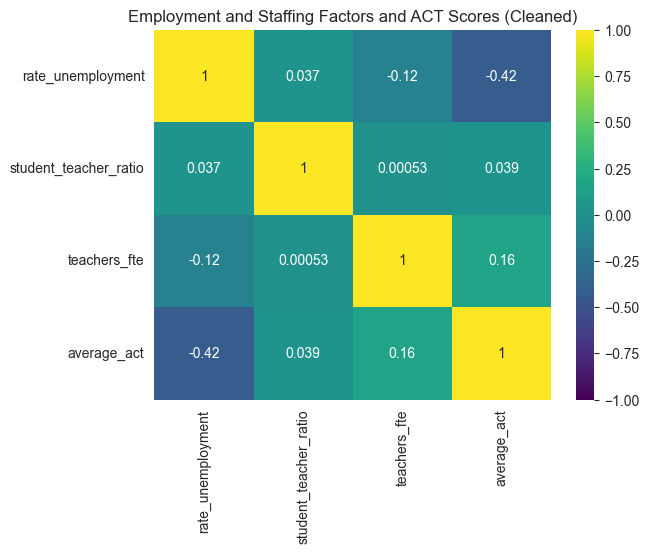

In [185]:
# --- Clean data for plotting ---
employment_plot = df[['rate_unemployment', 'student_teacher_ratio', 'teachers_fte', 'average_act', 'charter']].copy()

# Clean impossible values
for col in ['rate_unemployment', 'student_teacher_ratio', 'teachers_fte', 'average_act']:
    employment_plot.loc[(employment_plot[col] > 1e6) | (employment_plot[col] < 0), col] = np.nan

employment_plot = employment_plot.dropna()

# --- Heatmap ---
sns.heatmap(
    employment_plot[['rate_unemployment', 'student_teacher_ratio', 'teachers_fte', 'average_act']].corr(),
    annot=True, cmap='viridis', vmin=-1, vmax=1
)
plt.title("Employment and Staffing Factors and ACT Scores (Cleaned)")
plt.show()



The heatmap illustrates correlations between **employment and staffing factors** and **ACT scores** after cleaning invalid values.  
It shows a **moderate negative correlation** between unemployment rate and ACT performance (-0.42),  
indicating that higher community unemployment is associated with lower student achievement.  
Teacher-related variables, such as student–teacher ratio and teacher FTE, show weaker positive correlations,  
suggesting that while staffing resources contribute, community employment conditions have a stronger influence on ACT outcomes.


Created a pairplot to visualize relationships between **employment and staffing variables** and **average ACT scores**.  
Regression lines and scatter patterns reveal that higher unemployment rates generally correspond to lower ACT scores,  
while teacher-related factors show weaker or inconsistent trends.  
Color differentiation by **charter status** allows comparison across school types,  
helping to identify whether staffing and employment conditions affect ACT performance differently among schools.


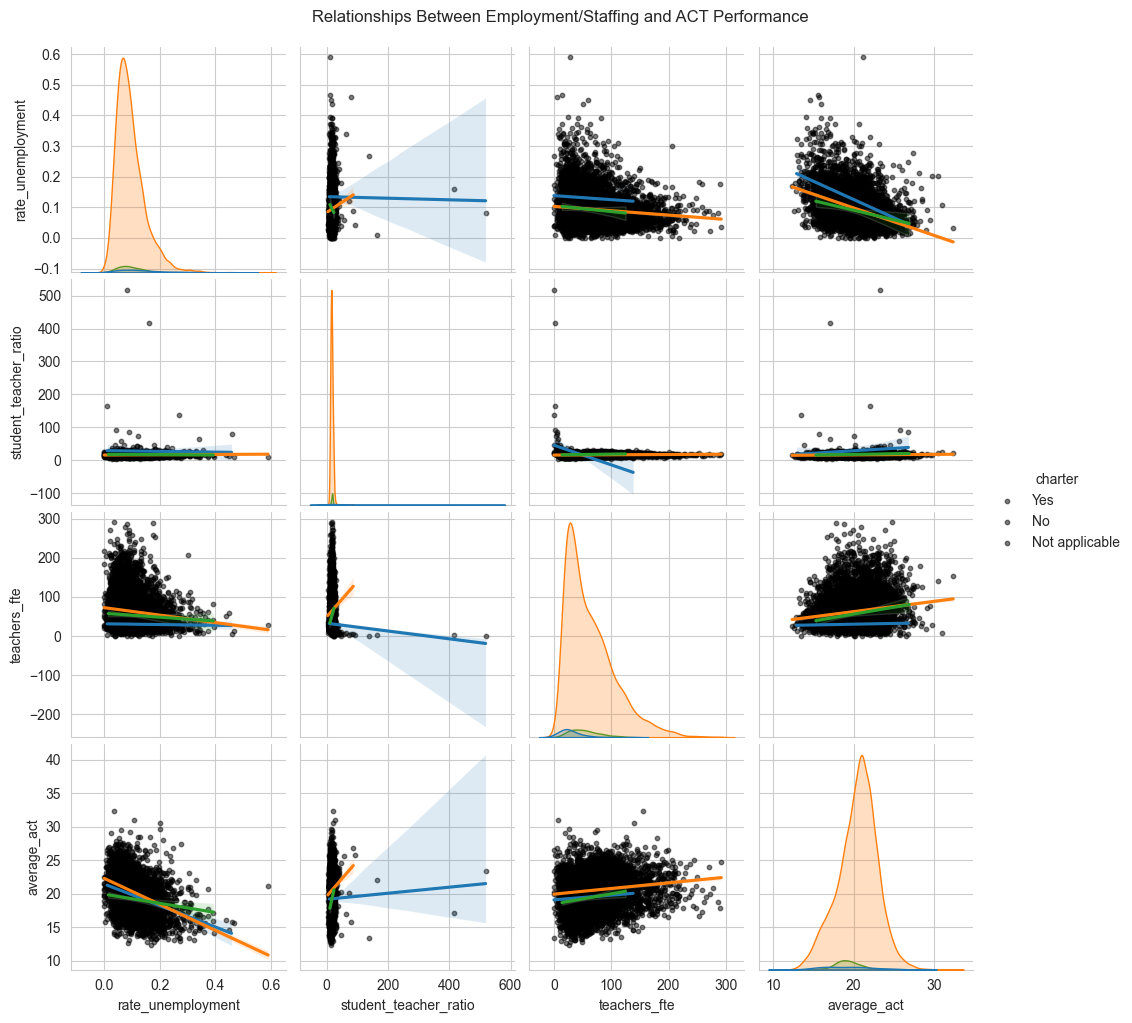

In [197]:
 Pairplot 
sns.pairplot(
    data=employment_plot,
    vars=['rate_unemployment', 'student_teacher_ratio', 'teachers_fte', 'average_act'],
    hue='charter',
    kind='reg',
    plot_kws={'scatter_kws': {'alpha': 0.5, 's': 10, 'color': 'k'}}
)
plt.suptitle("Relationships Between Employment/Staffing and ACT Performance", y=1.02)
plt.show()


The patterns show that downward-sloping lines for those eligible for free or reduced price lunch and those in the program for lower incomes increase while student test results fall. In general, we can say that economic disadvantage and limited school funding are the strongest predictors of lower ACT performance.

This section explores how community employment and school staffing relate to ACT scores.  
`rate_unemployment` shows a moderate negative correlation with `average_act`, suggesting that schools in areas with higher unemployment tend to have lower academic outcomes.  
Teacher-related variables show weaker relationships, indicating that broader community conditions may have a stronger effect than internal staffing ratios.


### School / Lunch Factors

Cleaned the school-level dataset by removing invalid or extreme values before visualization.  
Generated a correlation heatmap to examine how **poverty-related indicators**—such as the percentage of students on free or reduced lunch,  
school funding status, and number of free lunches—relate to **average ACT scores**.  
The heatmap highlights that higher poverty indicators are negatively correlated with ACT performance,  
emphasizing the strong impact of economic disadvantage on student outcomes.


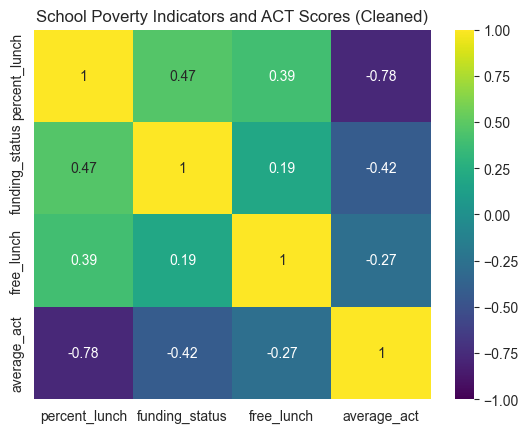

In [187]:

# --- Clean data for plotting ---
school_plot = df[['percent_lunch', 'funding_status', 'free_lunch', 'average_act', 'charter']].copy()

# Replace impossible or corrupted values
for col in ['percent_lunch', 'free_lunch', 'funding_status', 'average_act']:
    school_plot.loc[(school_plot[col] > 1e6) | (school_plot[col] < 0), col] = np.nan

school_plot = school_plot.dropna()

# --- Heatmap ---
sns.heatmap(
    school_plot[['percent_lunch', 'funding_status', 'free_lunch', 'average_act']].corr(),
    annot=True, cmap='viridis', vmin=-1, vmax=1
)
plt.title("School Poverty Indicators and ACT Scores (Cleaned)")
plt.show()



The heatmap illustrates correlations between **school poverty indicators** and **ACT scores** after cleaning invalid data.  
It reveals a strong **negative correlation** between the percentage of students on free or reduced lunch and ACT performance (r = -0.78),  
indicating that schools with higher poverty levels tend to have lower average ACT scores.  
Funding status and free lunch counts also show moderate negative relationships with test outcomes,  
supporting the conclusion that economic disadvantage strongly influences student achievement.


Created a pairplot to visualize the relationships between **school poverty indicators** and **average ACT scores**.  
The downward-sloping regression lines indicate that as poverty measures (such as free or reduced lunch rates) increase,  
ACT scores tend to decrease.  
Coloring by **charter status** allows for comparison between school types,  
revealing that economic disadvantage consistently correlates with lower academic performance across all schools.


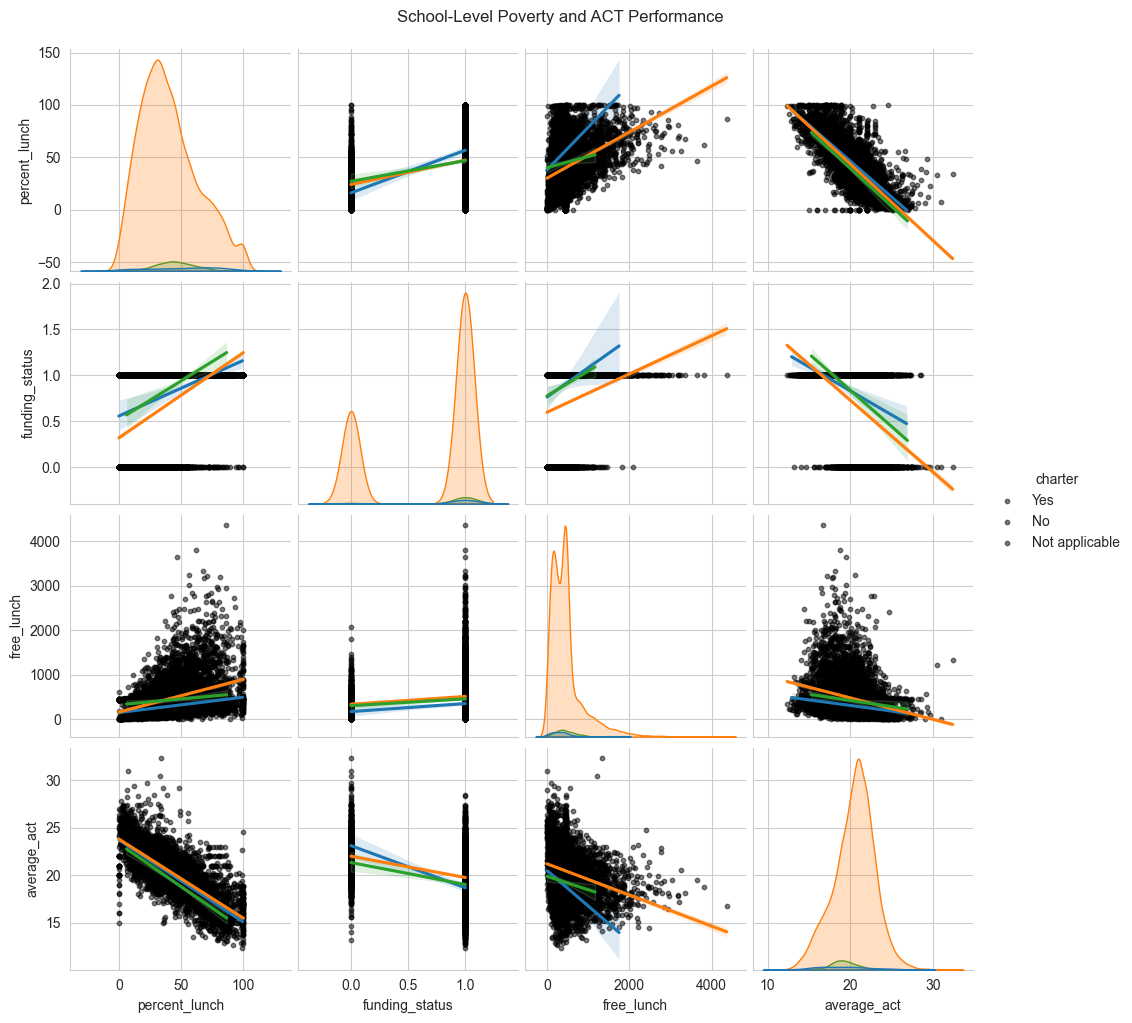

In [188]:
# Pairplot
sns.pairplot(
    data=school_plot,
    vars=['percent_lunch', 'funding_status', 'free_lunch', 'average_act'],
    hue='charter',
    kind='reg',
    plot_kws={'scatter_kws': {'alpha': 0.5, 's': 10, 'color': 'k'}}
)
plt.suptitle("School-Level Poverty and ACT Performance", y=1.02)
plt.show()


The pairplot visualizes the relationships between **school poverty variables** and **ACT scores**,  
revealing clear downward trends where higher poverty indicators (percent_lunch, free_lunch)  
are associated with lower ACT performance.  
The regression lines further confirm these negative correlations, showing that as economic hardship increases,  
average ACT scores decline across all school types.  
The visual distinction by **charter status** shows that this pattern holds true regardless of school classification.


#### Combined Significant Socioeconomic Factors and ACT Scores

Created a combined dataset including the most significant socioeconomic predictors:  
**median_income**, **percent_college**, **rate_unemployment**, **percent_lunch**, **funding_status**, and **average_act**.  
Invalid or extreme values were removed before visualization to ensure accurate correlation results.

The **heatmap** highlights the strongest relationships across all factors, showing that:  
- Higher **income** and **college education levels** are positively correlated with ACT performance.  
- Higher **poverty** and **unemployment rates** are negatively correlated with ACT performance.  

The **pairplot** provides a detailed view of these relationships, with regression trend lines confirming  
that schools in higher-income, better-educated, and lower-poverty communities achieve higher ACT scores.  
Coloring by **charter status** shows that this socioeconomic pattern holds consistently across school types.


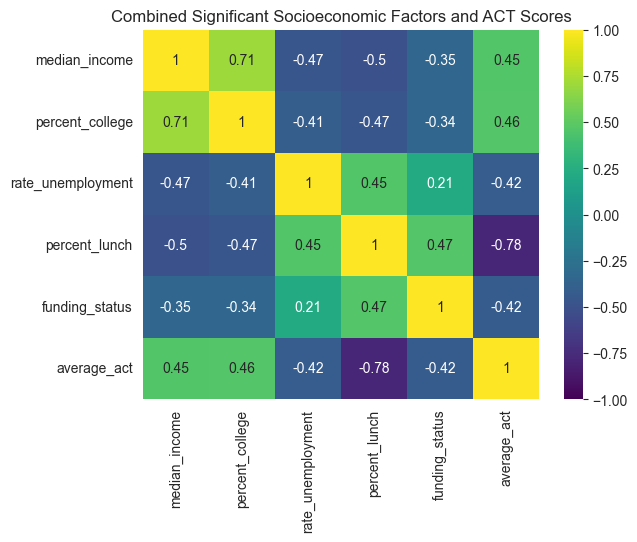

In [189]:

# Create a clean combined dataset for analysis
combined_plot = df[['median_income', 'percent_college', 'rate_unemployment',
                    'percent_lunch', 'funding_status', 'average_act', 'charter']].copy()

# Remove impossible or corrupted values
for col in ['median_income', 'percent_college', 'rate_unemployment', 'percent_lunch', 'funding_status', 'average_act']:
    combined_plot.loc[(combined_plot[col] > 1e6) | (combined_plot[col] < 0), col] = np.nan

combined_plot = combined_plot.dropna()

# Heatmap
sns.heatmap(
    combined_plot[['median_income', 'percent_college', 'rate_unemployment',
                   'percent_lunch', 'funding_status', 'average_act']].corr(),
    annot=True, cmap='viridis', vmin=-1, vmax=1
)
plt.title("Combined Significant Socioeconomic Factors and ACT Scores")
plt.show()

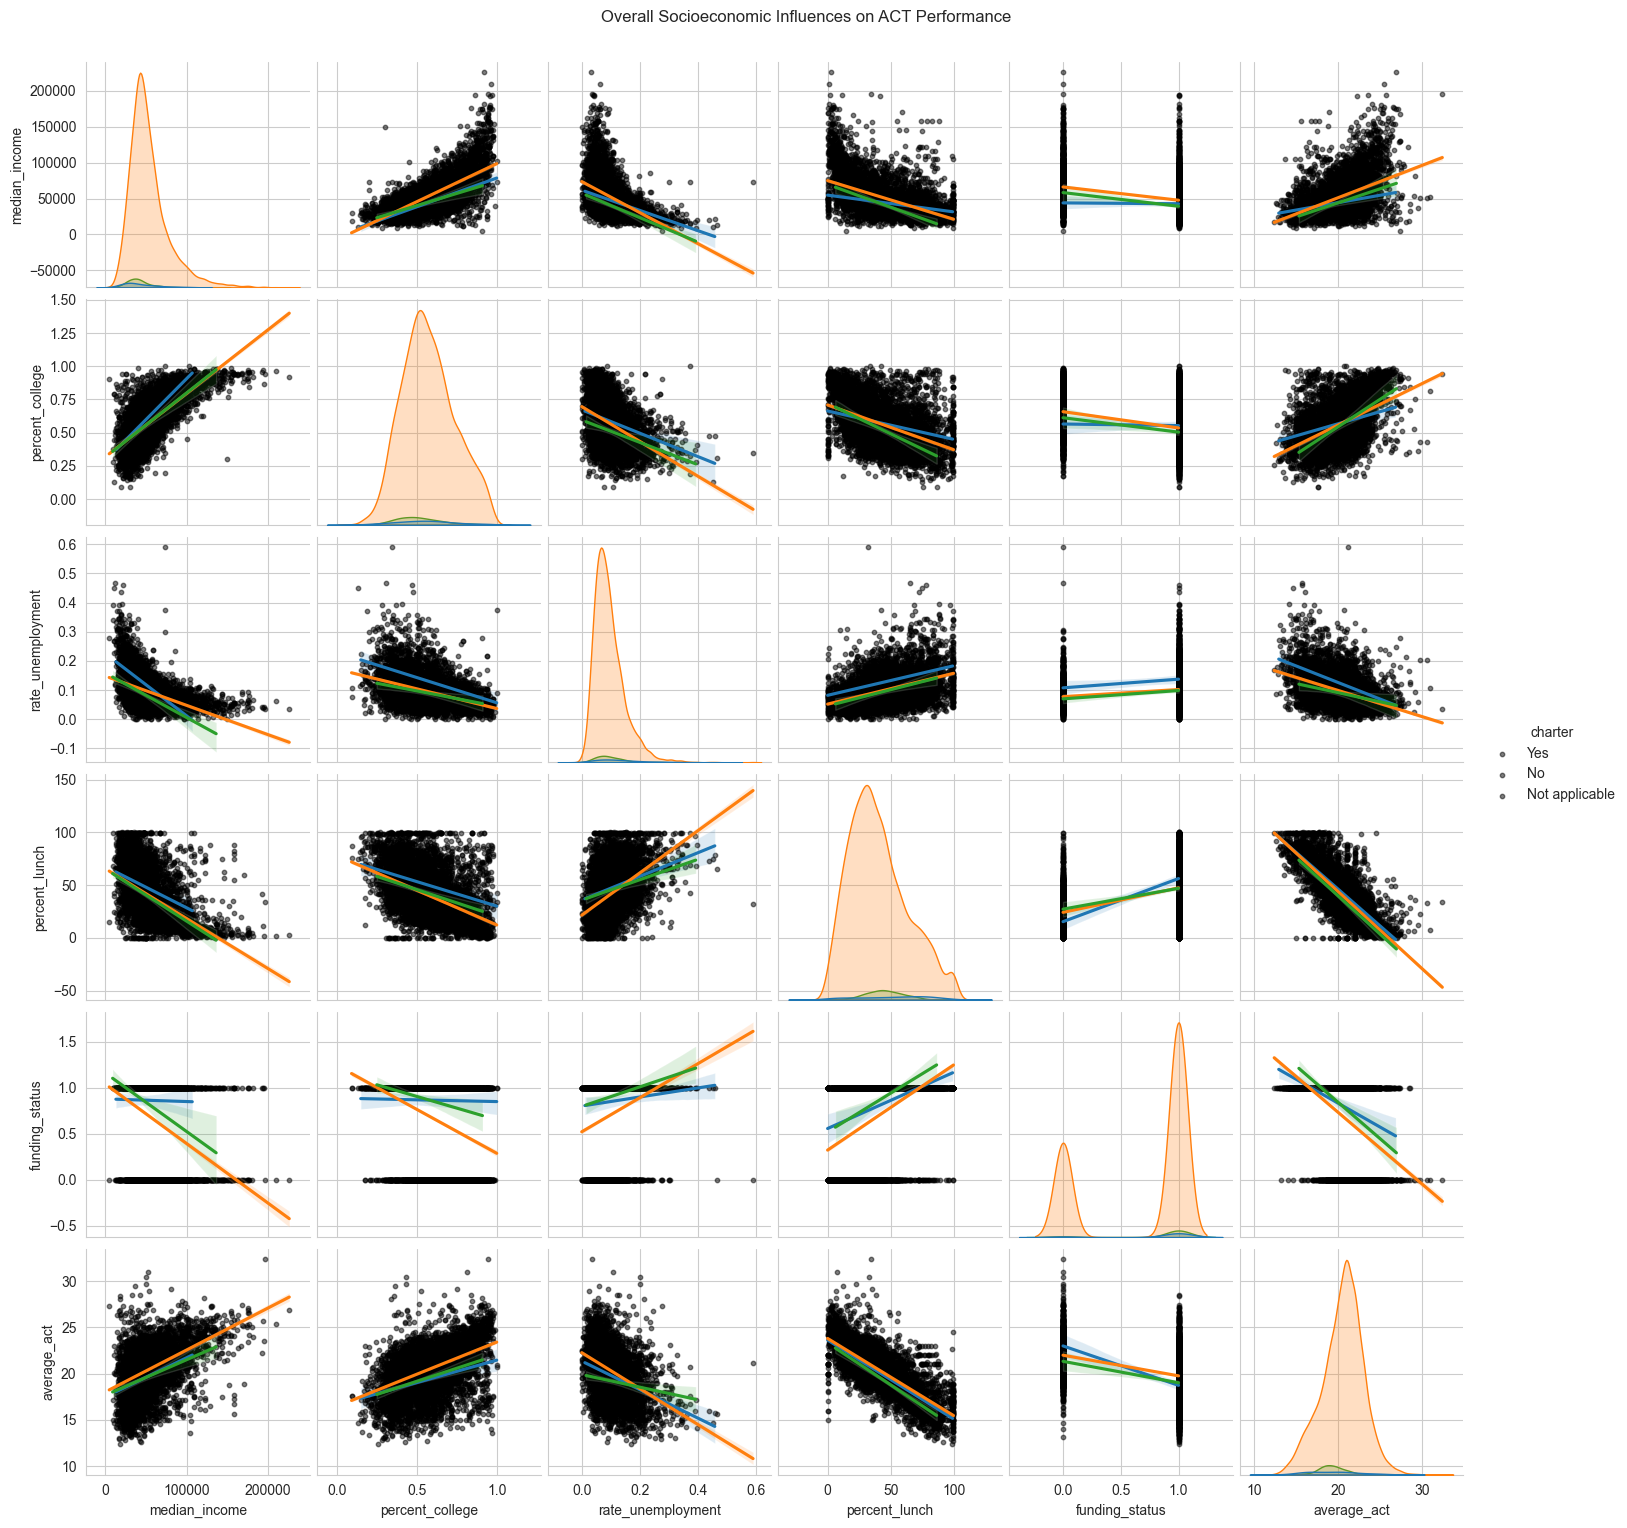

In [200]:
sns.pairplot(
    data=combined_plot,
    vars=['median_income', 'percent_college', 'rate_unemployment', 'percent_lunch', 'funding_status', 'average_act'],
    hue='charter',
    kind='reg',
    plot_kws={'scatter_kws': {'alpha': 0.5, 's': 10, 'color': 'k'}}
)
plt.suptitle("Overall Socioeconomic Influences on ACT Performance", y=1.02)
plt.show()


This final section brings together the most significant variables from all previous analyses.
The heatmap shows that `median_income` and `percent_college` have strong positive correlations
with ACT performance, while `percent_lunch`, `funding_status`, and `rate_unemployment` show
negative relationships. Among these, `percent_lunch` remains the most influential factor
(r = -0.78), confirming that socioeconomic disadvantage has the largest impact on student outcomes.
Overall, schools in higher-income, better-educated, and lower-unemployment communities
tend to achieve higher ACT scores, reinforcing the importance of economic opportunity
in educational performance.


### Multiple linear regression

Built a **multiple linear regression model** to examine how various socioeconomic and school-related variables collectively predict **average ACT scores**.  
The model includes indicators of income, education, employment, and school resources as predictors.  

The regression summary provides detailed statistical results such as:
- **Coefficients (coef):** show the direction and strength of each variable’s effect on ACT scores.  
- **P>|t| values:** indicate whether each predictor is statistically significant (p < 0.05).  
- **R-squared and Adjusted R-squared:** measure how well the model explains variation in ACT performance.  

These results help determine which socioeconomic and school factors most strongly influence student achievement.


In [65]:
model = smf.ols(
    formula='average_act ~ total_free_reduced_lunch + + teachers_fte + funding_status + reduced_lunch + free_lunch + student_teacher_ratio + rate_unemployment + percent_college + percent_married + median_income + percent_lunch',
    data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     1021.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        18:53:28   Log-Likelihood:                -11880.
No. Observations:                6515   AIC:                         2.378e+04
Df Residuals:                    6503   BIC:                         2.387e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

The R² and Adjusted R² values show model strength. The model’s R² = 0.63 means that 63% of the variation in ACT scores is explained by these predictors. High R²/Adjusted R² values with low p-values indicate that the regression model fits the data well and includes meaningful predictors of ACT scores.

Plotted the **residuals** of the multiple linear regression model against the **predicted ACT scores**  
to evaluate model fit and check assumptions of linearity and homoscedasticity.  
The random scatter of points around the horizontal zero line indicates that the residuals are evenly distributed,  
suggesting the model fits the data well without strong bias or systematic error patterns.


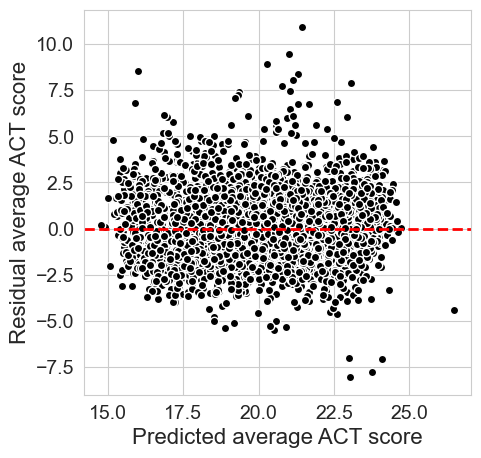

In [66]:
y_hat = model.predict()
plt.figure(figsize=(5, 5))

plt.plot (y_hat, model.resid, 'ko', mec='w') 
plt.axhline(0, color='r', linestyle='dashed', lw=2) 
    
plt.xlabel( 'Predicted average ACT score', fontsize=16) 
plt.ylabel('Residual average ACT score', fontsize=16)
    
plt.tick_params( labelsize=14)
plt.show()

The residual plot shows that the data points are randomly scattered around the zero line,  
indicating that the regression model captures most of the systematic variation in ACT scores.  
There is no clear pattern or curvature, suggesting that the assumptions of linearity and constant variance are met.  
Overall, the model provides a good fit for predicting average ACT performance based on socioeconomic factors.


Removed any remaining rows with missing values in key predictor or outcome variables to ensure accurate model evaluation.  
Used the fitted regression model to generate predicted ACT scores and calculated the **Mean Absolute Error (MAE)**  
to measure the model’s average prediction error.  
A lower MAE value indicates that the model’s predicted ACT scores are close to the actual values,  
demonstrating good predictive accuracy.


In [201]:
df_clean = df.dropna(subset=[
    'average_act', 'total_free_reduced_lunch', 'funding_status', 'reduced_lunch',
    'free_lunch', 'student_teacher_ratio', 'rate_unemployment',
    'percent_college', 'percent_married', 'median_income', 'percent_lunch'
])

predictions = model.predict(df_clean)
mae = mean_absolute_error(df_clean['average_act'], predictions)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 1.1204018062712537


The **Mean Absolute Error (MAE)** for the model is **1.120**, meaning that, on average,  
the model’s predicted ACT scores differ from the actual scores by about **1.12 points**.  
This relatively small error indicates that the regression model provides a strong and reliable prediction  
of average ACT performance based on socioeconomic and school-related factors.


### Reduced Model

Built a **reduced multiple linear regression model** using only the most significant predictors:  
**teachers_fte**, **funding_status**, **percent_lunch**, and **rate_unemployment**.  
This simplified model focuses on the strongest socioeconomic and school-level factors influencing ACT performance.  

The regression summary shows that:
- All predictors have **p-values < 0.001**, confirming their statistical significance.  
- The model’s **R-squared = 0.623**, meaning it explains about **62.3%** of the variation in ACT scores.  

This reduced model maintains high explanatory power while being more efficient and easier to interpret than the full model.


In [203]:
model_reduced = smf.ols(
    formula='average_act ~ teachers_fte + funding_status + percent_lunch + rate_unemployment',
    data=df).fit()
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     2687.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        23:25:39   Log-Likelihood:                -11972.
No. Observations:                6515   AIC:                         2.395e+04
Df Residuals:                    6510   BIC:                         2.399e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            23.7824      0.05

Plotted residuals for the **reduced regression model** to evaluate its fit and check assumptions.  
The scatter of residuals around the zero line indicates no visible pattern or bias,  
suggesting that the reduced model effectively captures the relationship between key socioeconomic factors and ACT performance.  
This confirms that simplifying the model did not compromise its accuracy or validity.


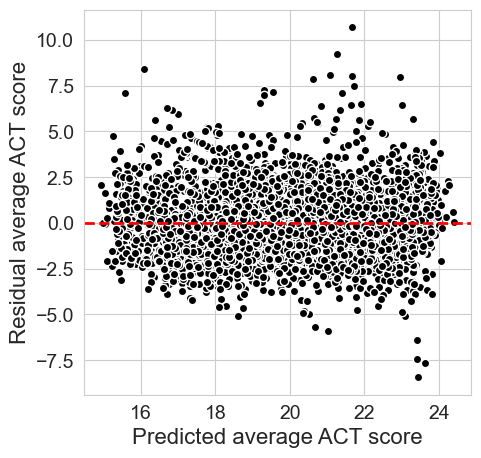

In [168]:
y_hat = model_reduced.predict()
plt.figure(figsize=(5, 5))

plt.plot (y_hat, model_reduced.resid, 'ko', mec='w') 
plt.axhline(0, color='r', linestyle='dashed', lw=2) 
    
plt.xlabel( 'Predicted average ACT score', fontsize=16) 
plt.ylabel('Residual average ACT score', fontsize=16)
    
plt.tick_params( labelsize=14)
plt.show()

The residual plot for the **reduced model** shows a random scatter of points around the zero line,  
indicating that the model’s predictions are unbiased and the linearity assumption is met.  
There is no clear pattern or curvature, suggesting constant variance and a good overall model fit.  
This confirms that the reduced model performs well in predicting ACT scores using the selected key predictors.


**Mean Absolute Error (MAE)** 

In [169]:
predictions = model_reduced.predict(df)
mask = (~df['average_act'].isna()) & (~predictions.isna())

mae = mean_absolute_error(df.loc[mask, 'average_act'], predictions[mask])
print("Mean Absolute Error:", mae)


Mean Absolute Error: 1.1410648248108801


The **Mean Absolute Error (MAE)** for the reduced model is **1.14**, meaning the predicted ACT scores  
differ from the actual values by about **1.14 points on average**.  
This is nearly identical to the full model’s error (1.12), indicating that simplifying the model  
did not significantly reduce predictive accuracy while improving interpretability.


Handling NaN Values During Model Evaluation
The Mean Absolute Error (MAE) calculation initially failed because either the
predicted or observed ACT scores contained missing values. This occurs when
some predictors still contain NaN values that cause `statsmodels` to output
NaN predictions for those rows. A boolean mask was applied to include only
rows with valid predictions and observed values in the MAE calculation.


In [170]:
# Generate predictions
pred_full = model.predict(df)
pred_reduced = model_reduced.predict(df)

# Keep only rows where both actual and predicted values are valid
mask_full = (~df['average_act'].isna()) & (~pred_full.isna())
mask_reduced = (~df['average_act'].isna()) & (~pred_reduced.isna())

# Compute MAE
mae_full = mean_absolute_error(df.loc[mask_full, 'average_act'], pred_full[mask_full])
mae_reduced = mean_absolute_error(df.loc[mask_reduced, 'average_act'], pred_reduced[mask_reduced])

# Get R-squared values
r2_full = model.rsquared
r2_reduced = model_reduced.rsquared

# Display comparison table
pd.DataFrame({
    'Mean Absolute Error': [mae_full, mae_reduced],
    'R-squared': [r2_full, r2_reduced]
}, index=['Full Model', 'Reduced Model']).round(4)


,Mean Absolute Error,R-squared
Full Model,1.1204,0.6333
Reduced Model,1.1411,0.6228


A comparison between the **Full Model** and the **Reduced Model** shows very similar performance although the reduced model is slightly less accurate (MAE increased by 0.02 and R² decreased by about 1%),  
the difference is minimal. This indicates that the reduced model retains nearly the same predictive power  
while using fewer variables, making it simpler and more efficient for interpretation.

Performed an **ANOVA (Analysis of Variance)** test to statistically compare the Full Model and Reduced Model.  
The test results are as follows:

In [171]:
anova_lm(model_reduced, model)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,6510.0,15049.483814,0.0,NaN,NaN,NaN
1,6503.0,14631.237459,7.0,418.246355,26.556254,3.806870e-36


The **F-statistic (26.56)** with a **p-value < 0.001** indicates that the additional variables in the Full Model  
significantly improve the model’s explanatory power compared to the Reduced Model.  
However, since the improvement in R² is very small (0.633 → 0.623),  
the Reduced Model remains a more efficient choice for interpretation without substantial loss of accuracy.

### Scaling

Defined the final set of **predictor variables** for the reduced regression model:  
**funding_status**, **rate_unemployment**, **teachers_fte**, and **percent_lunch**.  
These represent the most influential socioeconomic and school-related factors  
used to predict average ACT performance in the simplified model.


In [175]:
predictor_variables = ['funding_status', 'rate_unemployment', 'teachers_fte', 'percent_lunch']

Created a list of new column names for the **normalized (standardized)** versions of the selected predictors.  
Each variable name is appended with “_normalized” to indicate that it has been scaled  
to have a mean of 0 and a standard deviation of 1 for the normalized regression model.


In [176]:
scaled_columns = [var + '_normalized' for var in predictor_variables]
print(scaled_columns)

['funding_status_normalized', 'rate_unemployment_normalized', 'teachers_fte_normalized', 'percent_lunch_normalized']


Fitted the **StandardScaler** on the selected predictor variables to learn their mean and standard deviation.  
This prepares the model to standardize each variable so they are on the same scale,  
which allows for direct comparison of coefficient magnitudes in the normalized regression model.


In [177]:
scaler = StandardScaler().fit(df[predictor_variables])

Manually standardized each selected predictor variable by subtracting its mean and dividing by its standard deviation.  
This transformation centers all variables around a mean of **0** and scales them to a standard deviation of **1**,  
ensuring comparability across predictors.  
The summary table confirms successful normalization—each variable now has a mean near **0** and a standard deviation near **1**.


In [163]:
for c in predictor_variables:
    x = pd.to_numeric(df[c], errors='coerce')
    df[f'{c}_normalized'] = (x - x.mean()) / x.std(ddof=0)

df[[f'{c}_normalized' for c in predictor_variables]].agg(['mean','std']).round(3)


,funding_status_normalized,teachers_fte_normalized,percent_lunch_normalized
mean,0.0,0.0,0.0
std,1.0,1.0,1.0


The summary confirms that normalization was successful:  
each standardized predictor (**funding_status_normalized**, **teachers_fte_normalized**, and **percent_lunch_normalized**)  
has a mean of **0.0** and a standard deviation of **1.0**.  
This ensures all predictors are on the same scale for fair comparison in the normalized regression model.


Built a **normalized multiple linear regression model** using standardized predictors  
to allow for direct comparison of each variable’s influence on ACT scores.  
The model includes **rate_unemployment**, **funding_status_normalized**, **teachers_fte**,  
and **percent_lunch_normalized** as predictors.  

The regression summary shows that:
- All predictors remain **statistically significant (p < 0.001)**.  
- The model’s **R² = 0.623**, matching the reduced model’s explanatory power.  
- Because the variables are standardized, the **coefficients** now reflect the relative importance  
  of each predictor — with **percent_lunch_normalized** and **funding_status_normalized**  
  having the strongest negative effects on ACT performance.  

This confirms that socioeconomic disadvantage and school funding remain  
the most influential factors affecting student achievement even after normalization


In [178]:
model_normalized = smf.ols(
        formula='average_act ~ rate_unemployment + funding_status_normalized + teachers_fte + percent_lunch_normalized',
        data=df).fit()
print(model_normalized.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     2687.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        20:40:36   Log-Likelihood:                -11972.
No. Observations:                6515   AIC:                         2.395e+04
Df Residuals:                    6510   BIC:                         2.399e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

The **Normalized Model** achieved an **R-squared of 0.6228** and a **Mean Absolute Error (MAE) of 1.1411**.  
This means the model explains approximately **62.3% of the variation** in average ACT scores,  
with predictions differing from actual values by about **1.14 points on average**.  
These results are nearly identical to the reduced model’s performance, confirming that normalization  
did not alter predictive accuracy but improved interpretability by placing all predictors on the same scale.


In [179]:
# Generate predictions
pred_norm = model_normalized.predict(df)
pred_reduced = model_reduced.predict(df)

# Mask to remove any rows with NaN predictions or targets
mask_norm = (~df['average_act'].isna()) & (~pred_norm.isna())
mask_reduced = (~df['average_act'].isna()) & (~pred_reduced.isna())

# Calculate MAE
mae_normalized = mean_absolute_error(df.loc[mask_norm, 'average_act'], pred_norm[mask_norm])
mae_reduced = mean_absolute_error(df.loc[mask_reduced, 'average_act'], pred_reduced[mask_reduced])

# R-squared values from the fitted models
r2_normalized = model_normalized.rsquared
r2_reduced = model_reduced.rsquared

# Display comparison table
pd.DataFrame({
    'Mean Absolute Error': [mae_normalized, mae_reduced],
    'R-squared': [r2_normalized, r2_reduced]
}, index=['Normalized Model', 'Reduced Model']).round(4)


,Mean Absolute Error,R-squared
Normalized Model,1.1411,0.6228
Reduced Model,1.1411,0.6228
